# Reddit r/politics/hot top comment analyses

Reddit is an extremely popular online forum, ranking as #23 in internet traffic engagement(according to https://www.alexa.com/siteinfo/reddit.com). It is broken into subreddits, shortcut as r/, where users can post relevant links, images, videos, or simply text posts relevant to the particular subreddit. These posts are sometimes called threads. Other users may then reply to these threads with comments. This allows other users to reply to their comments, allowing for robust(occasionally), informative(sometimes), interesting(inane?) and diverse(hah!) conversation. 

All users registered to Reddit may upvote or downvote any thread or comment on the site, creating a score for each item. This score is known as Karma. Reddit also tracks the total Karma for each user (the cumulative of their earned karma from their posts comments). 

The purpose of this project is to analyze the top comments in trending  threads from the r/politics subreddit, in the section known as hot/. Put all of this together, and you get the URL of the site we are scraping for data: https://www.reddit.com/r/politics/hot.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

df = pd.read_csv('out.csv')
print(len(df))
df.head()

1443


,Name,TotalKarma,CommentKarma,DateTime,AdjustedKarma,AdjustedKarmaPercent
0,Landolph,5368,1,2011-04-07 20:52:15,5367,0.000186
1,Doctor420Strange69,511771,1,2021-03-27 19:46:08,511770,0.000002
2,boundingalong,9825,1,2015-08-21 07:05:24,9824,0.000102
3,TheGarreth,106071,1,2013-09-03 15:31:30,106070,0.000009
4,lpisme,133998,1,2011-04-15 20:59:09,133997,0.000007


### Analysis

Above is a snippet of the data we will be analyzing. I have been scraping data with RedditReader.ipynb and placing it into a .csv file for this section of the project. I have chosen this method for 2 reasons:
    
    1) Data scraping can be tedious, as it involves making several requests of the Reddit API and parsing the information
    2) This allows the opportunity to analyze data over several days of Reddit threads.

This project will analyze the data in a couple of ways, pertaining to the various Karma and times of creations of any comments, comment authors, and Reddit threads.

In [12]:
df = df.astype({'DateTime': 'datetime64'})
print(df.dtypes)

today = datetime.now()
start_date = today - timedelta(days = 30)
end_date = today

sortdf = df.sort_values(by=['DateTime'])

condition = (sortdf['DateTime'] >= start_date) & (sortdf['DateTime'] <= end_date)
newAccounts = sortdf.loc[condition]
print(len(newAccounts))
newAccounts.head()

Name                            object
TotalKarma                       int64
CommentKarma                     int64
DateTime                datetime64[ns]
AdjustedKarma                    int64
AdjustedKarmaPercent           float64
dtype: object
56


,Name,TotalKarma,CommentKarma,DateTime,AdjustedKarma,AdjustedKarmaPercent
849,forchimpssake,744,1,2022-02-23 18:27:02,743,0.001344
266,poor_choice_doer,333,1,2022-02-24 02:35:06,332,0.003003
989,plantslut20000,14,1,2022-02-24 19:14:47,13,0.071429
444,ochregeist,24123,1,2022-02-25 01:36:07,24122,0.000041
181,5th_attempt,1054,281,2022-02-25 22:33:32,773,0.266603


## Talk about what I'm analyzing

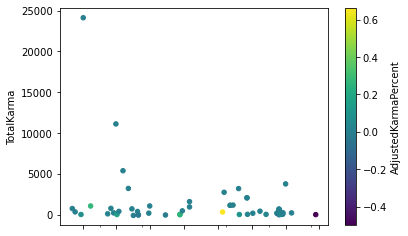

In [9]:
NewAccounts = newAccounts.plot.scatter(x='AuthorDateTime', y='TotalKarma', c='AdjustedKarmaPercent', colormap='viridis')